# Wasil Engel - Mini Lab 2 

In [1]:
from r_wrapper import diftrans
from r_wrapper import base
from r_wrapper import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# I talked to Ricardo Saucedo and Gina Son about this assignment.  
# Since we were given permission to do so, I'm just submitting my Jupyter notebook file.  

## 3.2 Understanding the Data

In [3]:
# This works once diftrans works!
Beijing_sample = base.get("Beijing_sample")
Tianjin_sample = base.get("Tianjin_sample")
# Focus on: 
# • year: an integer denoting the month and year
# • MSRP: manufacturers’ suggested retail price, i.e., the price of the car in renminbi (RMB)1 (good proxy for transaction price)
# • sales: the total number of cars sold

In [4]:
Beijing_sample.head() # 217155 rows × 16 columns

,id,year,month,ym,city,MSRP,sales,swtprice,color,noticenum,postBeijing,postTianjin,Beijing,Tianjin,Shijiazhuang,policy_dummy
1,416024,2010,1,14610.0,Beijing,139800,9.0,152.90585,灰,TV7161GLD,0.0,0.0,1.0,0.0,0.0,0
2,416025,2010,1,14610.0,Beijing,55900,145.0,152.90585,蓝,QCJ7151A5,0.0,0.0,1.0,0.0,0.0,0
3,416026,2010,1,14610.0,Beijing,207800,21.0,152.90585,黑,TV6460DLXM,0.0,0.0,1.0,0.0,0.0,0
4,416027,2010,1,14610.0,Beijing,105700,0.0,152.90585,黑灰,SDH6470M3,0.0,0.0,1.0,0.0,0.0,0
5,416028,2010,1,14610.0,Beijing,120800,3.0,152.90585,白,BH7165MX,0.0,0.0,1.0,0.0,0.0,0


In [5]:
Tianjin_sample.head() # 194468 rows × 16 columns

,id,year,month,ym,city,MSRP,sales,swtprice,color,noticenum,postBeijing,postTianjin,Beijing,Tianjin,Shijiazhuang,policy_dummy
1,1737542,2010,1,14610.0,Tianjin,120800,2.0,121.25181,红,BH7165MX,0.0,0.0,0.0,1.0,0.0,0
2,1737543,2010,1,14610.0,Tianjin,120800,3.0,121.25181,灰,LZ6511AQ3S,0.0,0.0,0.0,1.0,0.0,0
3,1737544,2010,1,14610.0,Tianjin,288000,4.0,121.25181,黄,CAF7204A,0.0,0.0,0.0,1.0,0.0,0
4,1737545,2010,1,14610.0,Tianjin,66800,0.0,121.25181,灰,MR7150B4,0.0,0.0,0.0,1.0,0.0,0
5,1737546,2010,1,14610.0,Tianjin,49800,3.0,121.25181,红,LZW7120K3Q,0.0,0.0,0.0,1.0,0.0,0


## 3.3 Clean Data of Beijing and Tianjin Car Sales

In [6]:
# keep 2010 and 2011 data only
Beijing = Beijing_sample[(Beijing_sample['year']>= 2010) & (Beijing_sample['year'] < 2012)]

In [7]:
# collect unique MSRP values (cf. above: good proxy for car prices)
uniqueMSRP = pd.DataFrame(Beijing.MSRP.unique()).rename(columns={0:'MSRP'})

In [8]:
# aggregate sales at each price for 2010 (pre-lottery)
Beijing10_sales = Beijing[(Beijing['year']== 2010)].groupby('MSRP').aggregate({'sales':[sum]})
Beijing10_sales = Beijing10_sales.unstack().reset_index().rename_axis(None, axis=1)
Beijing10_sales = Beijing10_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})

In [9]:
# merge the MSRP and sales
Beijing_pre = uniqueMSRP.merge(Beijing10_sales, how='left', on = "MSRP")
Beijing_pre[['count']] = Beijing_pre[['count']].fillna(value=0)
Beijing_pre = Beijing_pre.sort_values('MSRP')

# preview data
Beijing_pre.head() # 513 rows × 2 columns

,MSRP,count
482,20800,0.0
374,29800,47.0
338,32900,3153.0
227,33800,3678.0
388,34800,592.0


In [10]:
# Exercise 3.1

In [11]:
# a Beijing_post

In [12]:
# aggregate sales at each price for 2011 (post-lottery)
Beijing11_sales = Beijing[(Beijing['year']== 2011)].groupby('MSRP').aggregate({'sales':[sum]})
Beijing11_sales = Beijing11_sales.unstack().reset_index().rename_axis(None, axis=1)
Beijing11_sales = Beijing11_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
# merge the MSRP and sales
Beijing_post = uniqueMSRP.merge(Beijing11_sales, how='left', on = "MSRP")
Beijing_post[['count']] = Beijing_post[['count']].fillna(value=0)
Beijing_post = Beijing_post.sort_values('MSRP')
# preview data
Beijing_post.head() # 513 rows × 2 columns

,MSRP,count
482,20800,23.0
374,29800,0.0
338,32900,1393.0
227,33800,4.0
388,34800,189.0


In [13]:
# b Tianjin_pre

In [14]:
# keep 2010 and 2011 data only
Tianjin = Tianjin_sample[(Tianjin_sample['year']>= 2010) & (Tianjin_sample['year'] < 2012)]
# collect unique MSRP values (cf. above: good proxy for car prices)
uniqueMSRP = pd.DataFrame(Tianjin.MSRP.unique()).rename(columns={0:'MSRP'})

In [15]:
# aggregate sales at each price for 2011 (post-lottery)
Tianjin10_sales = Tianjin[(Tianjin['year']== 2010)].groupby('MSRP').aggregate({'sales':[sum]})
Tianjin10_sales = Tianjin10_sales.unstack().reset_index().rename_axis(None, axis=1)
Tianjin10_sales = Tianjin10_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
# merge the MSRP and sales
Tianjin_pre = uniqueMSRP.merge(Tianjin10_sales, how='left', on = "MSRP")
Tianjin_pre[['count']] = Tianjin_pre[['count']].fillna(value=0)
Tianjin_pre = Tianjin_pre.sort_values('MSRP')
# preview data
Tianjin_pre.head() # 513 rows × 2 columns

,MSRP,count
448,20800,0.0
464,28800,0.0
358,29800,51.0
494,30900,0.0
327,32900,599.0


In [16]:
# c Tianjin_post

In [17]:
# aggregate sales at each price for 2011 (post-lottery)
Tianjin11_sales = Tianjin[(Tianjin['year']== 2011)].groupby('MSRP').aggregate({'sales':[sum]})
Tianjin11_sales = Tianjin11_sales.unstack().reset_index().rename_axis(None, axis=1)
Tianjin11_sales = Tianjin11_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
# merge the MSRP and sales
Tianjin_post = uniqueMSRP.merge(Tianjin11_sales, how='left', on = "MSRP")
Tianjin_post[['count']] = Tianjin_post[['count']].fillna(value=0)
Tianjin_post = Tianjin_post.sort_values('MSRP')
# preview data
Tianjin_post.head() # 513 rows × 2 columns

,MSRP,count
448,20800,23.0
464,28800,7.0
358,29800,5.0
494,30900,1.0
327,32900,948.0


## 3.4 Visualize Beijing Car Sales

In [18]:
# uncount
df2 = Beijing_pre.pop('count')
Beijing_distribution_pre = pd.DataFrame(Beijing_pre.values.repeat(df2, axis=0), columns=Beijing_pre.columns)

In [19]:
df3 = Beijing_post.pop('count')
Beijing_distribution_post = pd.DataFrame(Beijing_post.values.repeat(df3, axis=0), columns=Beijing_post.columns)

No handles with labels found to put in legend.


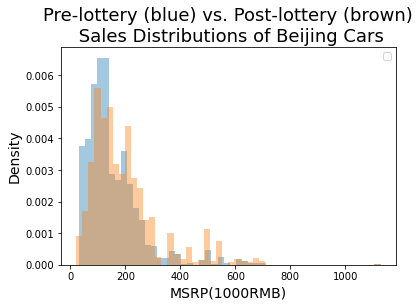

In [20]:
fig, ax = plt.subplots()
for a in [Beijing_distribution_pre, Beijing_distribution_post]:
    sns.distplot(a/1000, ax=ax, kde=False, norm_hist=True) # note: norm_hist=True
plt.xlabel("MSRP(1000RMB)", size=14)
plt.ylabel("Density", size=14)
plt.title("Pre-lottery (blue) vs. Post-lottery (brown)\n Sales Distributions of Beijing Cars", size=18)
plt.legend(loc='upper right')
# ax.set_xlim([0, 1200])

In [21]:
# Exercise 3.2

In [22]:
# a 

In [23]:
# uncount
df2 = Tianjin_pre.pop('count')
Tianjin_distribution_pre = pd.DataFrame(Tianjin_pre.values.repeat(df2, axis=0), columns=Tianjin_pre.columns)

In [24]:
df3 = Tianjin_post.pop('count')
Tianjin_distribution_post = pd.DataFrame(Tianjin_post.values.repeat(df3, axis=0), columns=Tianjin_post.columns)

No handles with labels found to put in legend.


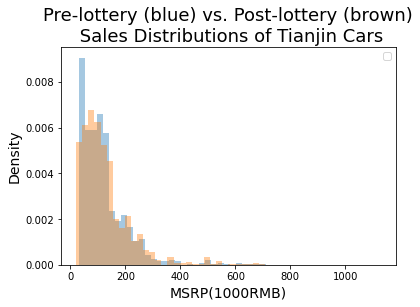

In [25]:
fig, ax = plt.subplots()
for a in [Tianjin_distribution_pre, Tianjin_distribution_post]:
    sns.distplot(a/1000, ax=ax, kde=False, norm_hist=True) # note: norm_hist=True
plt.xlabel("MSRP(1000RMB)", size=14)
plt.ylabel("Density", size=14)
plt.title("Pre-lottery (blue) vs. Post-lottery (brown)\n Sales Distributions of Tianjin Cars", size=18)
plt.legend(loc='upper right')
# ax.set_xlim([0, 1200])

In [26]:
# b 
# Compare and contrast the shift between the Beijing distributions with the shift between the 
# Tianjin distributions. Based on the shift in Tianjin car sales, should we be surprised to 
# see the shift in Beijing car sales?

In [27]:
# Based on the shift in Tianjin car sales, the shift in Beijing car sales is surprising. 
# Keeping in mind that the distributions have been normalized which allows for comparison 
# between both the years and the regions, differences between the Tianjin and Beijing 
# distributions can be noted. For example, the shift to the right towards more experience cars
# is merely noticeable in the Tianjin data: in 2010 (blue), car sales peak for the cheapest
# car on the far left of distribution, however, in 2011 (orange), sales peak at a slightly 
# more expensive car, but not by much. The right tail looks rather similar in 2010 and 2011. 
# The Beijing distribution, on the other side, looks different. First, note how the neat 
# overlap of the Tianjin data suggesting that the car sales across the two periods were 
# constant. In Beijing, however, the 2011 car sales distribution is much lower given the 
# introduction of the policy that aims at reducing traffic and pollution. Hence, that explains
# why the distribution is lower in general. However, given the normalization process, it still
# allows us to compare the two shapes of the pre- and post-lottery distributions for Beijing: 
# unlike Tianjin, the Beijing distributions are rather similar on the left side of the 
# distribution peeking at similar values at around x = 100, however, the right-end tails 
# differ quite a bit! Despite selling less cars in general in 2011, the height of the bars 
# at the lower right-hand tail compare in size and as such in magnitude suggesting that 
# relative to the car sales distributions in 2011 as well as 2010, the sell of expensive 
# cars has significantly increased. That's interesting and worth investigating in more detail!
# As noted in section 3.1, this may suggest the existence of a black market where licenses 
# are being obtained by wealthy Beijing'ers who can afford to buy more expensive cars. 
# On a side note, note how the scale of the x-axis remains constant (pricing same across 
# cities), while the scale of the y-axis changes from a max of approx. 100,000 down to 40,000
# given the different population and hence sales sizes of the two cities, Beijing v. Tianjin, 
# respectively. 

# Lastly, given that Beijing introduced the lottery policy but Tianjin didn't, the slight 
# spike in more expensive car sales in Tianjin could also be a *spill-over* from Beijing. The 
# two cities are only a 1-hour drive apart, so, some people from Beijing might have gone to 
# Tianjin to buy a car causing the sales distribution there to slightly shift to the right too. 

## 3.5 Compute Before-and-After Estimator

In [28]:
# Exercise 3.3

In [29]:
# What if difference just due to sampling variation and the Beijing distributions for 2010 
# and 2011 are actually the same so that the true transport cost is at 0 per cent? 
# To prove this claim wrong, transport costs from repeated samples must be non-zero!  
# a) build one placebo distribution with the same number of observations like P Beijing BEFORE
# b) build another placebo with the same number of observations like P Beijing AFTER
# Note: both are sampled from same distribution, P Beijing Before, but different sizes

In [30]:
base.set_seed(0) # for reproducibility
n_observations = 100000
placebo_demonstration = pd.DataFrame({'sample1': np.random.normal(0, 1, n_observations), 'sample2': np.random.normal(0, 1, n_observations)})
placebo_demonstration.head()

,sample1,sample2
0,0.258594,1.309787
1,0.151054,0.314449
2,-2.089034,0.043868
3,0.591708,1.034616
4,-0.861662,0.995136


Text(0.5, 1.0, 'Two Samples from Standard Normal Distribution')

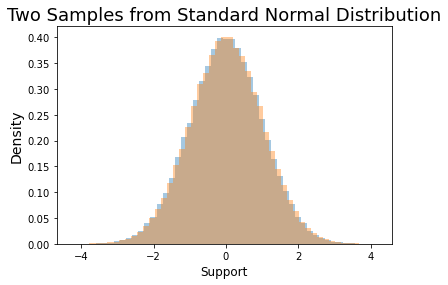

In [31]:
fig, ax = plt.subplots()
ax = sns.distplot(placebo_demonstration['sample1'], ax=ax, kde=False, norm_hist=True)
ax = sns.distplot(placebo_demonstration['sample2'], ax=ax, kde=False, norm_hist=True)
plt.xlabel("Support", size=12)
plt.ylabel("Density", size=14)
plt.title("Two Samples from Standard Normal Distribution", size=18)

In [32]:
# a)
# build one placebo distribution with the same number of observations like P Beijing BEFORE

In [33]:
# re-run lines 5-8 to get 513 rows, not just 504 rows
# keep 2010 and 2011 data only
Beijing = Beijing_sample[(Beijing_sample['year']>= 2010) & (Beijing_sample['year'] < 2012)]
# collect unique MSRP values (cf. above: good proxy for car prices)
uniqueMSRP = pd.DataFrame(Beijing.MSRP.unique()).rename(columns={0:'MSRP'})
# aggregate sales at each price for 2010 (pre-lottery)
Beijing10_sales = Beijing[(Beijing['year']== 2010)].groupby('MSRP').aggregate({'sales':[sum]})
Beijing10_sales = Beijing10_sales.unstack().reset_index().rename_axis(None, axis=1)
Beijing10_sales = Beijing10_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
# merge the MSRP and sales
Beijing_pre = uniqueMSRP.merge(Beijing10_sales, how='left', on = "MSRP")
Beijing_pre[['count']] = Beijing_pre[['count']].fillna(value=0)
Beijing_pre = Beijing_pre.sort_values('MSRP')
# preview data
# Beijing_pre.head() # 513 rows × 2 columns

In [34]:
# set the seed for reproducibility set.seed(1)
# We will use the `rmultinom` function to construct our placebo.
# Imagine the same number of cars as in 2010. (see `size` argument)
# For each MSRP value, we will decide how many of these imaginary cars will
# be sold at this price. The number of these imaginary cars to be sold at
# the particular MSRP value will be proportional to the actual number of cars
# sold in the pre-lottery distribution. (see `prob` argument) 
# We only want one placebo distribution. (see `n` argument) with 
# placebo_1 <- data.frame(MSRP = Beijing_pre[‘MSRP’],
base.set_seed(1)
Beijing_pre = uniqueMSRP.merge(Beijing10_sales, how='left', on = "MSRP")
Beijing_pre[['count']] = Beijing_pre[['count']].fillna(value=0)
Beijing_pre = Beijing_pre.sort_values('MSRP')
# starts here: 
count =  stats.rmultinom(n = 1, size = sum(Beijing_pre['count']), prob = Beijing_pre['count'])
count2 = count[:,0]
d = {'MSRP': Beijing_pre['MSRP'], 'count' : count2}
placebo_1 = pd.DataFrame(data=d)
print(placebo_1)
print(placebo_1.dtypes)

        MSRP  count
482    20800      0
374    29800     50
338    32900   3136
227    33800   3597
388    34800    539
..       ...    ...
263   703600    350
7     770000    101
314   800400      2
433   998000      6
5    1127800    325

[513 rows x 2 columns]
MSRP     int64
count    int32
dtype: object


In [35]:
# b)
# build another placebo with the same number of observations like P Beijing AFTER

In [36]:
# re-run line 11 to get 513 rows, not just 504 rows
# aggregate sales at each price for 2011 (post-lottery)
Beijing11_sales = Beijing[(Beijing['year']== 2011)].groupby('MSRP').aggregate({'sales':[sum]})
Beijing11_sales = Beijing11_sales.unstack().reset_index().rename_axis(None, axis=1)
Beijing11_sales = Beijing11_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
# merge the MSRP and sales
Beijing_post = uniqueMSRP.merge(Beijing11_sales, how='left', on = "MSRP")
Beijing_post[['count']] = Beijing_post[['count']].fillna(value=0)
Beijing_post = Beijing_post.sort_values('MSRP')
# preview data
# Beijing_post.head() # 513 rows × 2 columns

In [37]:
# Imagine the same number of cars as in 2011. (see `size` argument)
# For each MSRP value, we will decide how many of these imaginary cars will
# be sold at this price. The number of these imaginary cars to be sold at
# the particular MSRP value will be proportional to the actual number of cars
# sold in the pre-lottery distribution. (see `prob` argument) 
# We only want one placebo distribution. (see `n` argument) with 
# placebo_1 <- data.frame(MSRP = Beijing_pre[‘MSRP’],
base.set_seed(1)
Beijing_post = uniqueMSRP.merge(Beijing11_sales, how='left', on = "MSRP")
Beijing_post[['count']] = Beijing_post[['count']].fillna(value=0)
Beijing_post = Beijing_post.sort_values('MSRP')
# Beijing_pre = uniqueMSRP.merge(Beijing10_sales, how='left', on = "MSRP")
# Beijing_pre[['count']] = Beijing_pre[['count']].fillna(value=0)
# Beijing_pre = Beijing_pre.sort_values('MSRP')
# starts here: 
count =  stats.rmultinom(n = 1, size = sum(Beijing_post['count']), prob = Beijing_pre['count'])
# I just changed the size argument to Beijing_post because we're supposed to have a sample
# of the same size like P Beijing AFTER, with the rest essentially being the same 
count2 = count[:,0]
d = {'MSRP': Beijing_post['MSRP'], 'count' : count2}
placebo_2 = pd.DataFrame(data=d)
print(placebo_2)
print(placebo_2.dtypes)

        MSRP  count
482    20800      0
374    29800     17
338    32900   1308
227    33800   1581
388    34800    243
..       ...    ...
263   703600    157
7     770000     35
314   800400      1
433   998000      1
5    1127800    133

[513 rows x 2 columns]
MSRP     int64
count    int32
dtype: object


In [38]:
# c
# Do they appear to be drawn from the same distribution?

Text(0.5, 1.0, 'Placebo 1 v. Placebo 2')

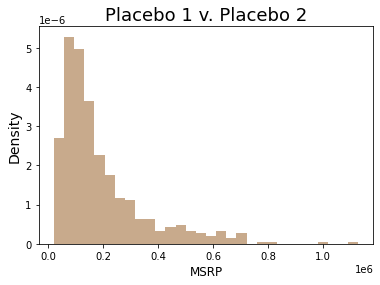

In [39]:
fig, ax = plt.subplots()
ax = sns.distplot(placebo_1['MSRP'], ax=ax, kde=False, norm_hist=True)
ax = sns.distplot(placebo_2['MSRP'], ax=ax, kde=False, norm_hist=True)
plt.xlabel("MSRP", size=12)
plt.ylabel("Density", size=14)
plt.title("Placebo 1 v. Placebo 2", size=18)

In [40]:
# Yes, they do appear very similar, a difference is not noticeable with the bare eye. 
# That makes sense because the placebo data is our null, meaning as if there was no black market (while we hypothesize that there is one given the actual/ empirical data).
# But I shall investigate that in more detail below. 

In [41]:
# Exercise 3.4

In [42]:
# OH Chris: placebo is what would happen if there was no black market (the null) v. empirical is what actually happens

In [43]:
# a  

In [44]:
# use increments of 5000 
bandwidth = []
for i in range(0, 100005, 5000):
    bandwidth.append(i)

In [45]:
transport_cost_placebos = diftrans.diftrans(pre_main = placebo_1, post_main = placebo_2, bandwidth_seq = bandwidth)
# The transport cost for the specified bandwidths have been computed
print(transport_cost_placebos)

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.



    bandwidth      main
1           0  0.013586
2        5000  0.001516
3       10000  0.000621
4       15000  0.000578
5       20000  0.000556
6       25000  0.000438
7       30000  0.000386
8       35000  0.000385
9       40000  0.000385
10      45000  0.000385
11      50000  0.000037
12      55000  0.000037
13      60000  0.000037
14      65000  0.000037
15      70000  0.000013
16      75000  0.000013
17      80000  0.000013
18      85000  0.000013
19      90000  0.000013
20      95000  0.000013
21     100000  0.000013


In [46]:
# b 

In [47]:
transport_cost_observed = diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, bandwidth_seq = bandwidth)
print(transport_cost_observed)

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.



    bandwidth      main
1           0  0.353123
2        5000  0.177859
3       10000  0.151831
4       15000  0.138059
5       20000  0.123160
6       25000  0.100769
7       30000  0.088075
8       35000  0.077251
9       40000  0.064889
10      45000  0.055253
11      50000  0.053762
12      55000  0.053758
13      60000  0.051261
14      65000  0.050689
15      70000  0.040988
16      75000  0.040815
17      80000  0.039061
18      85000  0.038952
19      90000  0.030705
20      95000  0.028104
21     100000  0.027120


In [48]:
# c 

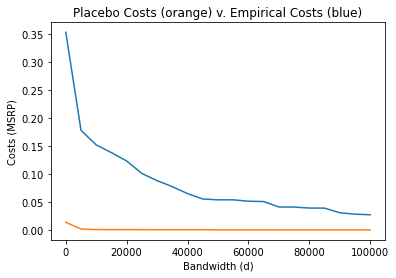

In [49]:
sns.lineplot(transport_cost_observed["bandwidth"], transport_cost_observed["main"])
sns.lineplot(transport_cost_placebos["bandwidth"], transport_cost_placebos["main"])
plt.title('Placebo Costs (orange) v. Empirical Costs (blue)')
plt.xlabel('Bandwidth (d)')
plt.ylabel('Costs (MSRP)')
plt.show()

In [50]:
# d 

In [51]:
benchmark = 0.05
transport_cost_placebos.loc[transport_cost_placebos["main"]*100<benchmark]
# The placebo cost is less than 0.05% for values of d >= 25,000 and d <= 100,000.

,bandwidth,main
6,25000,0.000438
7,30000,0.000386
8,35000,0.000385
9,40000,0.000385
10,45000,0.000385
11,50000,0.000037
12,55000,0.000037
13,60000,0.000037
14,65000,0.000037
15,70000,0.000013


In [52]:
# e 

In [53]:
# As shown above in the table in d), the smallest d with a placebo costs of less than 0.05% is found at d = 25,000.

# For empirical/ observed transport costs, the associated value is approx. 0.100769 for d = 25,000 (see table in b).
# This is the estimate for the lower bound on the volume of black market transactions, the so-called before-and-after estimate.

## 3.6 Compute Differences-in-Transports Estimator

In [54]:
# Exercise 3.5 

In [55]:
# a 

In [56]:
bandwidth_cons = []
for i in range(0, 50005, 5000):
    bandwidth_cons.append(i)

In [75]:
dit_1 = diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, pre_control = Tianjin_pre, post_control = Tianjin_post, bandwidth_seq = bandwidth_cons, conservative = True) 
print(dit_1)

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.106214258132936 at d = 5000



    bandwidth      main    main2d   control      diff    diff2d
1           0  0.353123  0.353123  0.298681  0.054443  0.054443
2        5000  0.177859  0.151831  0.045617  0.132243  0.106214
3       10000  0.151831  0.123160  0.020093  0.131737  0.103066
4       15000  0.138059  0.088075  0.017838  0.120220  0.070237
5       20000  0.123160  0.064889  0.013056  0.110104  0.051833
6       25000  0.100769  0.053762  0.007158  0.093610  0.046604
7       30000  0.088075  0.051261  0.006841  0.081234  0.044420
8       35000  0.077251  0.040988  0.006663  0.070588  0.034325
9       40000  0.064889  0.039061  0.006377  0.058512  0.032684
10      45000  0.055253  0.030705  0.004319  0.050934  0.026386
11      50000  0.053762  0.027120  0.004310  0.049453  0.022811


In [58]:
# b 

In [59]:
Beijing = Beijing_sample[(Beijing_sample['year']>= 2010) & (Beijing_sample['year'] < 2012)]
uniqueMSRP = pd.DataFrame(Beijing.MSRP.unique()).rename(columns={0:'MSRP'})
Beijing10_sales = Beijing[(Beijing['year']== 2010)].groupby('MSRP').aggregate({'sales':[sum]})
Beijing10_sales = Beijing10_sales.unstack().reset_index().rename_axis(None, axis=1)
Beijing10_sales = Beijing10_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
Beijing_pre = uniqueMSRP.merge(Beijing10_sales, how='left', on = "MSRP")
Beijing_pre[['count']] = Beijing_pre[['count']].fillna(value=0)
Beijing_pre = Beijing_pre.sort_values('MSRP')
base.set_seed(1)
Beijing_pre = uniqueMSRP.merge(Beijing10_sales, how='left', on = "MSRP")
Beijing_pre[['count']] = Beijing_pre[['count']].fillna(value=0)
Beijing_pre = Beijing_pre.sort_values('MSRP')
count =  stats.rmultinom(n = 1, size = sum(Beijing_pre['count']), prob = Beijing_pre['count'])
count2 = count[:,0]
d = {'MSRP': Beijing_pre['MSRP'], 'count' : count2}
placebo_Beijing_1 = pd.DataFrame(data=d)
print(placebo_Beijing_1)
print(placebo_Beijing_1.dtypes)

        MSRP  count
482    20800      0
374    29800     50
338    32900   3136
227    33800   3597
388    34800    539
..       ...    ...
263   703600    350
7     770000    101
314   800400      2
433   998000      6
5    1127800    325

[513 rows x 2 columns]
MSRP     int64
count    int32
dtype: object


In [60]:
# c 

In [61]:
Beijing11_sales = Beijing[(Beijing['year']== 2011)].groupby('MSRP').aggregate({'sales':[sum]})
Beijing11_sales = Beijing11_sales.unstack().reset_index().rename_axis(None, axis=1)
Beijing11_sales = Beijing11_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
Beijing_post = uniqueMSRP.merge(Beijing11_sales, how='left', on = "MSRP")
Beijing_post[['count']] = Beijing_post[['count']].fillna(value=0)
Beijing_post = Beijing_post.sort_values('MSRP')
base.set_seed(1)
Beijing_post = uniqueMSRP.merge(Beijing11_sales, how='left', on = "MSRP")
Beijing_post[['count']] = Beijing_post[['count']].fillna(value=0)
Beijing_post = Beijing_post.sort_values('MSRP')
count =  stats.rmultinom(n = 1, size = sum(Beijing_post['count']), prob = Beijing_pre['count'])
count2 = count[:,0]
d = {'MSRP': Beijing_post['MSRP'], 'count' : count2}
placebo_Beijing_2 = pd.DataFrame(data=d)
print(placebo_Beijing_2)
print(placebo_Beijing_2.dtypes)

        MSRP  count
482    20800      0
374    29800     17
338    32900   1308
227    33800   1581
388    34800    243
..       ...    ...
263   703600    157
7     770000     35
314   800400      1
433   998000      1
5    1127800    133

[513 rows x 2 columns]
MSRP     int64
count    int32
dtype: object


In [62]:
# d 

In [63]:
Tianjin = Tianjin_sample[(Tianjin_sample['year']>= 2010) & (Tianjin_sample['year'] < 2012)]
uniqueMSRP = pd.DataFrame(Tianjin.MSRP.unique()).rename(columns={0:'MSRP'})
Tianjin10_sales = Tianjin[(Tianjin['year']== 2010)].groupby('MSRP').aggregate({'sales':[sum]})
Tianjin10_sales = Tianjin10_sales.unstack().reset_index().rename_axis(None, axis=1)
Tianjin10_sales = Tianjin10_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
Tianjin_pre = uniqueMSRP.merge(Tianjin10_sales, how='left', on = "MSRP")
Tianjin_pre[['count']] = Tianjin_pre[['count']].fillna(value=0)
Tianjin_pre = Tianjin_pre.sort_values('MSRP')
base.set_seed(1)
Tianjin_pre = uniqueMSRP.merge(Tianjin10_sales, how='left', on = "MSRP")
Tianjin_pre[['count']] = Tianjin_pre[['count']].fillna(value=0)
Tianjin_pre = Tianjin_pre.sort_values('MSRP')
count =  stats.rmultinom(n = 1, size = sum(Tianjin_pre['count']), prob = Tianjin_pre['count'])
count2 = count[:,0]
d = {'MSRP': Tianjin_pre['MSRP'], 'count' : count2}
placebo_Tianjin_1 = pd.DataFrame(data=d)
print(placebo_Tianjin_1)
print(placebo_Tianjin_1.dtypes)

        MSRP  count
448    20800      0
464    28800      0
358    29800     54
494    30900      0
327    32900    593
..       ...    ...
92    698600     19
272   703600     26
218   770000      4
426   800400      0
237  1127800     13

[504 rows x 2 columns]
MSRP     int64
count    int32
dtype: object


In [64]:
# e
# I assume that there's a typo in the wording and what you're actually 
# asking for is "Construct a placebo distribution called placebo_Tianjin_2
# that is sampled from Tianjin_pre and whose size is the number of 
# Tianjin cars in *2011*, not 2010 (because I did that above in d)."

In [65]:
Tianjin11_sales = Tianjin[(Tianjin['year']== 2011)].groupby('MSRP').aggregate({'sales':[sum]})
Tianjin11_sales = Tianjin11_sales.unstack().reset_index().rename_axis(None, axis=1)
Tianjin11_sales = Tianjin11_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
Tianjin_post = uniqueMSRP.merge(Tianjin11_sales, how='left', on = "MSRP")
Tianjin_post[['count']] = Tianjin_post[['count']].fillna(value=0)
Tianjin_post = Tianjin_post.sort_values('MSRP')
base.set_seed(1)
Tianjin_post = uniqueMSRP.merge(Tianjin11_sales, how='left', on = "MSRP")
Tianjin_post[['count']] = Tianjin_post[['count']].fillna(value=0)
Tianjin_post = Tianjin_post.sort_values('MSRP')
count =  stats.rmultinom(n = 1, size = sum(Tianjin_post['count']), prob = Tianjin_pre['count'])
count2 = count[:,0]
d = {'MSRP': Tianjin_post['MSRP'], 'count' : count2}
placebo_Tianjin_2 = pd.DataFrame(data=d)
print(placebo_Tianjin_2)
print(placebo_Tianjin_2.dtypes)

        MSRP  count
448    20800      0
464    28800      0
358    29800     58
494    30900      0
327    32900    663
..       ...    ...
92    698600     21
272   703600     28
218   770000      5
426   800400      0
237  1127800     14

[504 rows x 2 columns]
MSRP     int64
count    int32
dtype: object


In [66]:
# f

In [67]:
dit_2 = diftrans.diftrans(pre_main = placebo_Beijing_1, post_main = placebo_Beijing_2, pre_control = placebo_Tianjin_1, post_control = placebo_Tianjin_2, bandwidth_seq = bandwidth_cons, conservative = True) 
print(dit_2)

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.00109067067882007 at d = 0



    bandwidth      main    main2d   control      diff    diff2d
1           0  0.013586  0.013586  0.012495  0.001091  0.001091
2        5000  0.001516  0.000621  0.001156  0.000360 -0.000535
3       10000  0.000621  0.000556  0.000106  0.000515  0.000449
4       15000  0.000578  0.000386  0.000073  0.000506  0.000313
5       20000  0.000556  0.000385  0.000049  0.000507  0.000336
6       25000  0.000438  0.000037  0.000030  0.000408  0.000008
7       30000  0.000386  0.000037  0.000019  0.000366  0.000018
8       35000  0.000385  0.000013  0.000002  0.000383  0.000011
9       40000  0.000385  0.000013  0.000002  0.000383  0.000011
10      45000  0.000385  0.000013  0.000002  0.000383  0.000011
11      50000  0.000037  0.000013  0.000002  0.000035  0.000011


In [68]:
# g 

In [69]:
diff2d = abs(dit_2["diff2d"])
diff2d

1     0.001091
2     0.000535
3     0.000449
4     0.000313
5     0.000336
6     0.000008
7     0.000018
8     0.000011
9     0.000011
10    0.000011
11    0.000011
Name: diff2d, dtype: float64

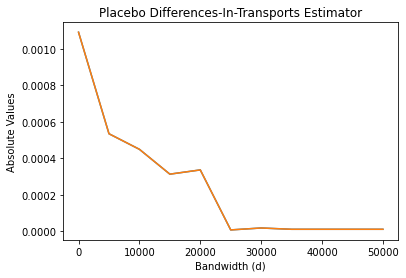

In [70]:
sns.lineplot(transport_cost_observed["bandwidth"], diff2d)
sns.lineplot(transport_cost_placebos["bandwidth"], diff2d)
plt.title('Placebo Differences-In-Transports Estimator')
plt.xlabel('Bandwidth (d)')
plt.ylabel('Absolute Values')
plt.show()

In [71]:
# h 

In [72]:
benchmark = 0.05
dit_2.loc[diff2d*100<benchmark]
# The placebo cost is less than 0.05% for values of d >= 10,000 and d <= 50,000. 

,bandwidth,main,main2d,control,diff,diff2d
3,10000,0.000621,0.000556,0.000106,0.000515,0.000449
4,15000,0.000578,0.000386,0.000073,0.000506,0.000313
5,20000,0.000556,0.000385,0.000049,0.000507,0.000336
6,25000,0.000438,0.000037,0.000030,0.000408,0.000008
7,30000,0.000386,0.000037,0.000019,0.000366,0.000018
8,35000,0.000385,0.000013,0.000002,0.000383,0.000011
9,40000,0.000385,0.000013,0.000002,0.000383,0.000011
10,45000,0.000385,0.000013,0.000002,0.000383,0.000011
11,50000,0.000037,0.000013,0.000002,0.000035,0.000011


In [73]:
# i

In [74]:
# As shown above in the table in d), I consider d-values >= 10,000 and <= 50,000.

# Among these values, the largest value in diff2d from part a) yields:
# d = 10,000 which is associated with a diff2d of approx. 0.103066 
# (and a conservative transport cost for Beijing of approx. 0.123160).
# This is the differences-in-transports estimator. 